# Libraries

In [1]:
installed = False

while not installed:
    try:
        import time
        import os

        import numpy as np
        import pandas as pd

        import matplotlib.pyplot as plt
        import seaborn as sns

        import tensorflow as tf
        from tensorflow import keras

        from riotwatcher import LolWatcher, ApiError
        
        installed = True

    except ModuleNotFoundError:
        installed = False
        %pip install -U riotwatcher
        %pip install -q -U seaborn

# API & Account Settings

In [2]:
os.environ["riotAPI"] = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

### API Key

In [3]:
API_KEY = os.getenv('riotAPI')

### Account Settings

In [171]:
region = 'euw1' # account region
summoner_name = 'Your Summoner Name'
n_games = 100

In [172]:
lol_watcher = LolWatcher(API_KEY)
my_region = region
me = lol_watcher.summoner.by_name(my_region, summoner_name)
my_ranked_stats = lol_watcher.league.by_summoner(my_region, me['id'])

In [173]:
versions = lol_watcher.data_dragon.versions_for_region(my_region)
champions_version = versions['n']['champion']
summoner_spells_version=versions['n']['summoner']
items_version=versions['n']['item']

current_champ_list = lol_watcher.data_dragon.champions(champions_version)
current_summoner_list = lol_watcher.data_dragon.summoner_spells(summoner_spells_version)

matches_ids = lol_watcher.match.matchlist_by_puuid(my_region, me['puuid'], count=n_games)

In [174]:
games = {}

participants = []
for i in range(n_games):
    print(f"Fetching game {i} of {n_games}")
    try:
        last_match = matches_ids[i]

        match_detail = lol_watcher.match.by_id(my_region, last_match)

        champ_dict = {}
        for key in current_champ_list['data']: 
            row = current_champ_list['data'][key] 
            champ_dict[row['key']] = row['id']

        summoners_dict = {}
        for key in current_summoner_list['data']:
                row = current_summoner_list['data'][key]
                summoners_dict[row['key']] = row['id']

        for row in match_detail['info']['participants']:
            if match_detail['info']['gameMode'] == "CLASSIC" and match_detail['info']['gameType'] == "MATCHED_GAME":
                participants_row = {}
                participants_row['champion'] = champ_dict[str(row['championId'])]
                participants_row['Summoner_name'] = lol_watcher.summoner.by_id(my_region, row['summonerId']).get('name')
                participants_row['win'] = row['win']
                participants_row['assists'] = row['assists']
                participants_row['spell1'] = summoners_dict[str(row['summoner1Id'])]
                participants_row['spell2'] = summoners_dict[str(row['summoner2Id'])]
                participants_row['totalDamageDealt'] = row['totalDamageDealt']
                participants_row['goldEarned'] = row['goldEarned']
                participants_row['champLevel'] = row['champLevel']            
                participants_row['deaths'] = row['deaths']                    
                participants_row['firstBloodKill'] = row['firstBloodKill']      
                participants_row['firstTowerKill'] = row['firstTowerKill']           
                participants_row['individualPosition'] = row['individualPosition']
                participants_row['kills'] = row['kills']             
                participants_row['physicalDamageDealt'] = row['physicalDamageDealt']
                participants_row['magicDamageDealt'] = row['magicDamageDealt']      
                participants_row['trueDamageDealt'] = row['trueDamageDealt']   
                participants_row['wardsPlaced'] = row['wardsPlaced']     
                participants_row['matchId'] = match_detail['metadata']['matchId']
                participants_row['gameDuration'] = match_detail['info']['gameDuration']

                participants.append(participants_row)
        
        time.sleep(10)
                
    except ApiError as err:
         print(err)
         time.sleep(10)
         continue 

Fetching game 0 of 100
Fetching game 1 of 100
Fetching game 2 of 100
Fetching game 3 of 100
Fetching game 4 of 100
Fetching game 5 of 100
Fetching game 6 of 100
Fetching game 7 of 100
Fetching game 8 of 100
Fetching game 9 of 100
Fetching game 10 of 100
Fetching game 11 of 100
Fetching game 12 of 100
Fetching game 13 of 100
Fetching game 14 of 100
Fetching game 15 of 100
Fetching game 16 of 100
Fetching game 17 of 100
Fetching game 18 of 100
Fetching game 19 of 100
Fetching game 20 of 100
Fetching game 21 of 100
Fetching game 22 of 100
Fetching game 23 of 100
Fetching game 24 of 100
Fetching game 25 of 100
Fetching game 26 of 100
Fetching game 27 of 100
Fetching game 28 of 100
Fetching game 29 of 100
Fetching game 30 of 100
Fetching game 31 of 100
Fetching game 32 of 100
Fetching game 33 of 100
Fetching game 34 of 100
Fetching game 35 of 100
Fetching game 36 of 100
Fetching game 37 of 100
Fetching game 38 of 100
Fetching game 39 of 100
Fetching game 40 of 100
Fetching game 41 of 100
Fe

In [175]:
df = pd.DataFrame(participants)
df['win'] = df['win'].astype(int)
df['firstBloodKill'] = df['firstBloodKill'].astype(int)
df['firstTowerKill'] = df['firstTowerKill'].astype(int)
df.to_csv(f'{summoner_name}.csv', index=False)

In [176]:
summoner_df = df[df.Summoner_name == summoner_name]

In [192]:
summoner_df

,champion,Summoner_name,win,assists,spell1,spell2,totalDamageDealt,goldEarned,champLevel,deaths,firstBloodKill,firstTowerKill,individualPosition,kills,physicalDamageDealt,magicDamageDealt,trueDamageDealt,wardsPlaced,matchId,gameDuration
6,Sejuani,Amico Mio,0,13,SummonerSmite,SummonerFlash,264081,15645,17,8,0,0,JUNGLE,6,138319,68962,56798,3,EUW1_6327613399,2335
16,Belveth,Amico Mio,0,8,SummonerSmite,SummonerFlash,195341,11299,15,10,0,0,JUNGLE,5,139768,19657,35915,0,EUW1_6327572420,1826
29,Milio,Amico Mio,0,9,SummonerDot,SummonerFlash,44470,8010,14,3,0,0,UTILITY,1,8575,35319,576,12,EUW1_6327554551,1836
38,Sivir,Amico Mio,0,12,SummonerExhaust,SummonerFlash,218667,13666,15,12,1,0,BOTTOM,7,202578,2941,13147,9,EUW1_6327457873,2012
49,Taric,Amico Mio,1,29,SummonerDot,SummonerFlash,65509,12245,17,6,0,0,UTILITY,4,18594,39633,7281,24,EUW1_6327432991,2272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Lulu,Amico Mio,0,22,SummonerDot,SummonerFlash,33528,11085,14,8,0,0,UTILITY,4,5674,26435,1418,9,EUW1_6295907613,1924
962,Vladimir,Amico Mio,0,6,SummonerHaste,SummonerFlash,180193,11562,15,12,0,0,MIDDLE,3,12350,158369,9473,5,EUW1_6295846021,1872
972,Cassiopeia,Amico Mio,1,3,SummonerTeleport,SummonerFlash,233429,16183,18,12,0,0,MIDDLE,10,12138,219808,1483,10,EUW1_6295793666,2355
986,Shen,Amico Mio,0,12,SummonerTeleport,SummonerFlash,51292,7730,14,6,0,0,TOP,1,28894,18084,4312,3,EUW1_6295751660,1806


In [193]:
train_dataset_raw = summoner_df.sample(frac=0.8,random_state=0)
test_dataset_raw = summoner_df.drop(train_dataset_raw.index)

train_dataset=train_dataset_raw.drop(['champion', 'matchId', 'individualPosition', 'spell2', 'spell1', 'win', 'Summoner_name'], axis=1)
test_dataset=test_dataset_raw.drop(['champion', 'matchId', 'individualPosition', 'spell2', 'spell1', 'win', 'Summoner_name'], axis=1)

train_labels = train_dataset_raw.loc[:, df.columns == 'win']
test_labels = test_dataset_raw.loc[:, df.columns == 'win']

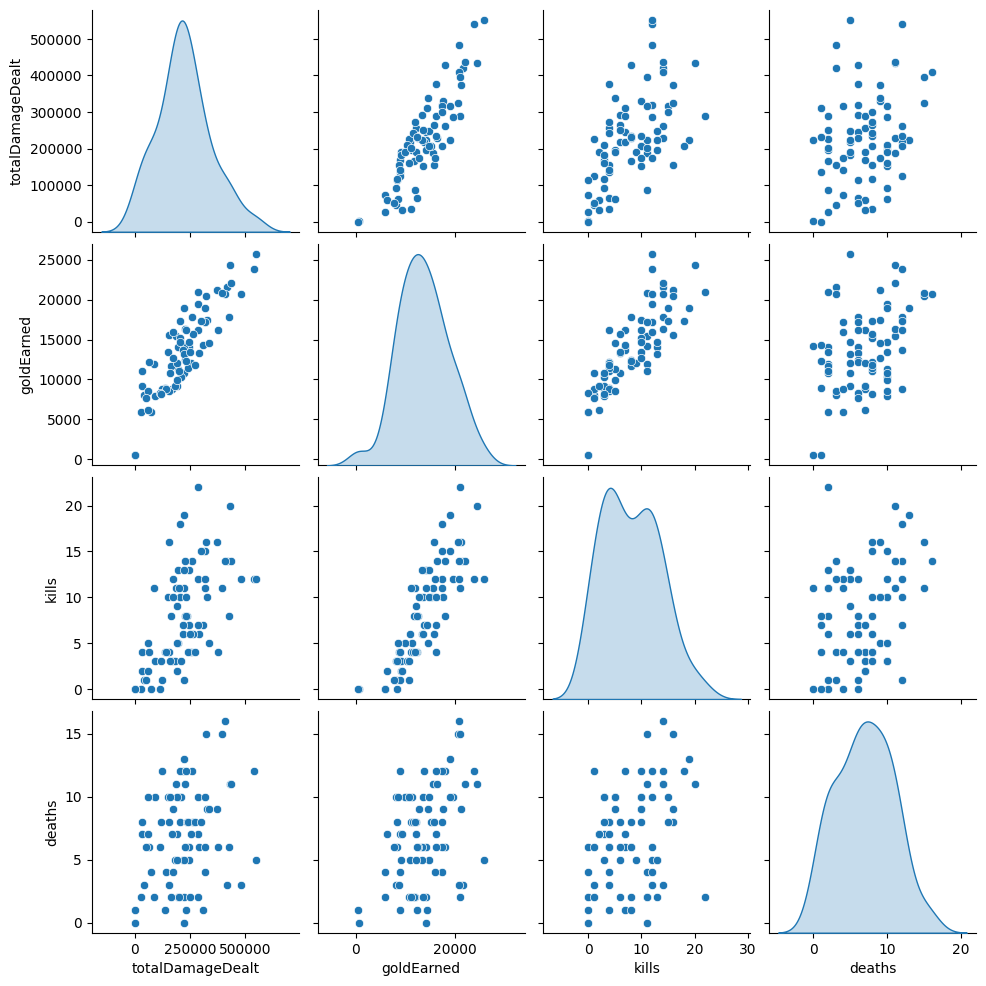

In [194]:
sns.pairplot(train_dataset[['totalDamageDealt', 'goldEarned', 'kills', 'deaths']], diag_kind="kde")

C:\Users\Matte\AppData\Local\Temp\ipykernel_1704\2700840290.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = summoner_df.corr()


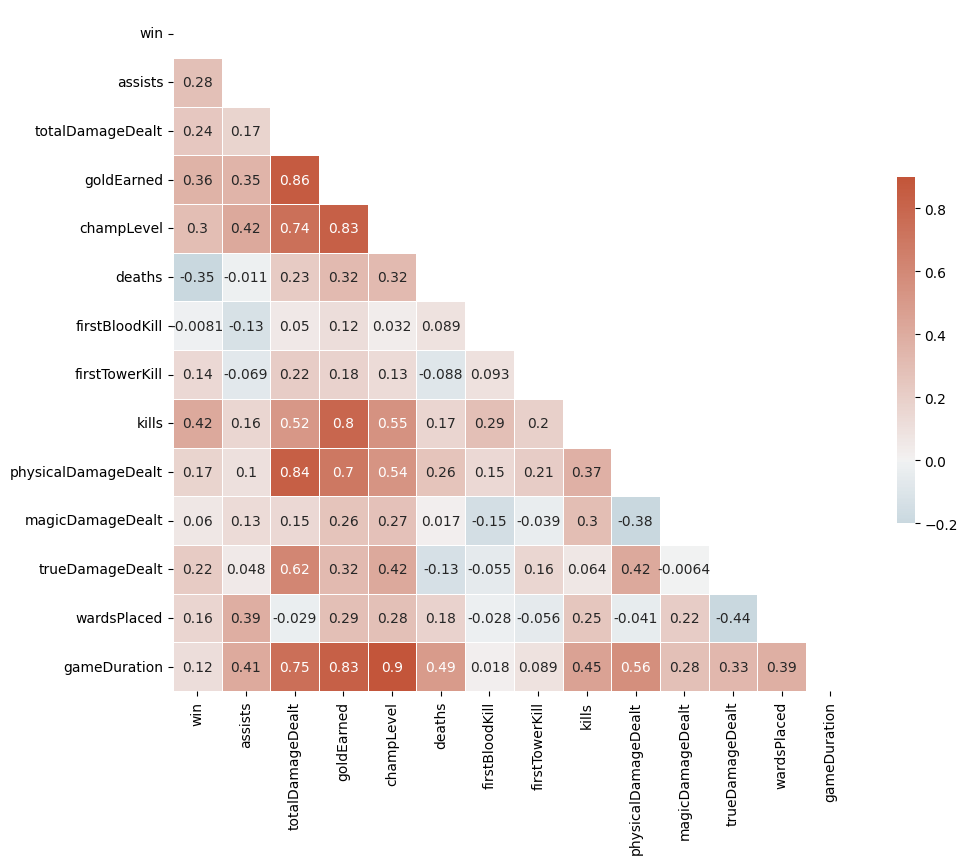

In [195]:
corr = summoner_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.9, center=0, vmin=-0.2, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

In [121]:
def normalize_dataset(dataset):
    return ( (dataset - dataset.mean()) / dataset.std())

In [122]:
normalized_train_data = normalize_dataset(train_dataset)
normalized_test_data = normalize_dataset(test_dataset)

In [123]:
normalized_train_data.dropna(axis=1, how='all', inplace=True)
normalized_test_data.dropna(axis=1, how='all', inplace=True)

In [196]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.build(input_shape=(None, len(train_dataset.columns)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [197]:
epochs = 200
init_weights = model.get_weights()

In [198]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer=optimizer)

# Train the model
history = model.fit(train_dataset, train_labels, epochs=epochs, callbacks=[lr_schedule])

Epoch 1/200
3/3 [==============================] - 1s 11ms/step - loss: 18502.8906 - lr: 1.0000e-08
Epoch 2/200
3/3 [==============================] - 0s 9ms/step - loss: 18442.8145 - lr: 1.1220e-08
Epoch 3/200
3/3 [==============================] - 0s 9ms/step - loss: 16399.0859 - lr: 1.2589e-08
Epoch 4/200
3/3 [==============================] - 0s 10ms/step - loss: 19612.3633 - lr: 1.4125e-08
Epoch 5/200
3/3 [==============================] - 0s 11ms/step - loss: 19234.6914 - lr: 1.5849e-08
Epoch 6/200
3/3 [==============================] - 0s 10ms/step - loss: 16924.6230 - lr: 1.7783e-08
Epoch 7/200
3/3 [==============================] - 0s 10ms/step - loss: 16339.4668 - lr: 1.9953e-08
Epoch 8/200
3/3 [==============================] - 0s 10ms/step - loss: 18181.8535 - lr: 2.2387e-08
Epoch 9/200
3/3 [==============================] - 0s 10ms/step - loss: 18669.3691 - lr: 2.5119e-08
Epoch 10/200
3/3 [==============================] - 0s 14ms/step - loss: 20485.2500 - lr: 2.8184e-08
E

(1e-08, 89.1250938133744, 0.0, 22681.1015625)

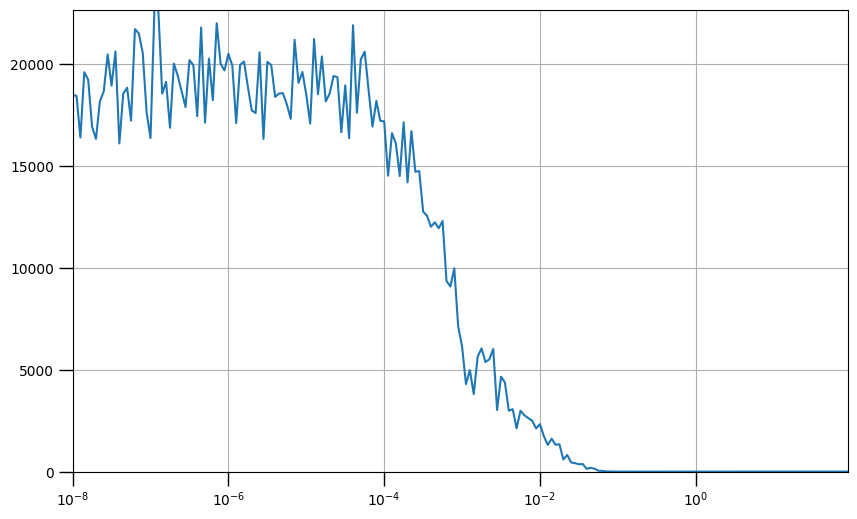

In [199]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(epochs) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

plt.axis([1e-8, max(lrs), 0, max(history.history["loss"])])

In [200]:
learning_rate = 1e-3

# Reset the weights
model.set_weights(init_weights)

In [201]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

model.compile(
    loss='binary_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy'])

history = model.fit(train_dataset, train_labels, epochs=epochs, validation_data=(test_dataset, test_labels))

Epoch 1/200
3/3 [==============================] - 1s 97ms/step - loss: 17558.0059 - accuracy: 0.5375 - val_loss: 15591.8105 - val_accuracy: 0.3500
Epoch 2/200
3/3 [==============================] - 0s 28ms/step - loss: 16459.3945 - accuracy: 0.5375 - val_loss: 13155.3301 - val_accuracy: 0.3500
Epoch 3/200
3/3 [==============================] - 0s 28ms/step - loss: 11709.6680 - accuracy: 0.5750 - val_loss: 10832.4209 - val_accuracy: 0.3500
Epoch 4/200
3/3 [==============================] - 0s 27ms/step - loss: 12759.5371 - accuracy: 0.5000 - val_loss: 8620.0098 - val_accuracy: 0.3500
Epoch 5/200
3/3 [==============================] - 0s 28ms/step - loss: 10693.4521 - accuracy: 0.5500 - val_loss: 6429.8599 - val_accuracy: 0.3500
Epoch 6/200
3/3 [==============================] - 0s 29ms/step - loss: 9342.9326 - accuracy: 0.5250 - val_loss: 4474.0400 - val_accuracy: 0.3500
Epoch 7/200
3/3 [==============================] - 0s 25ms/step - loss: 7560.6875 - accuracy: 0.4750 - val_loss: 271

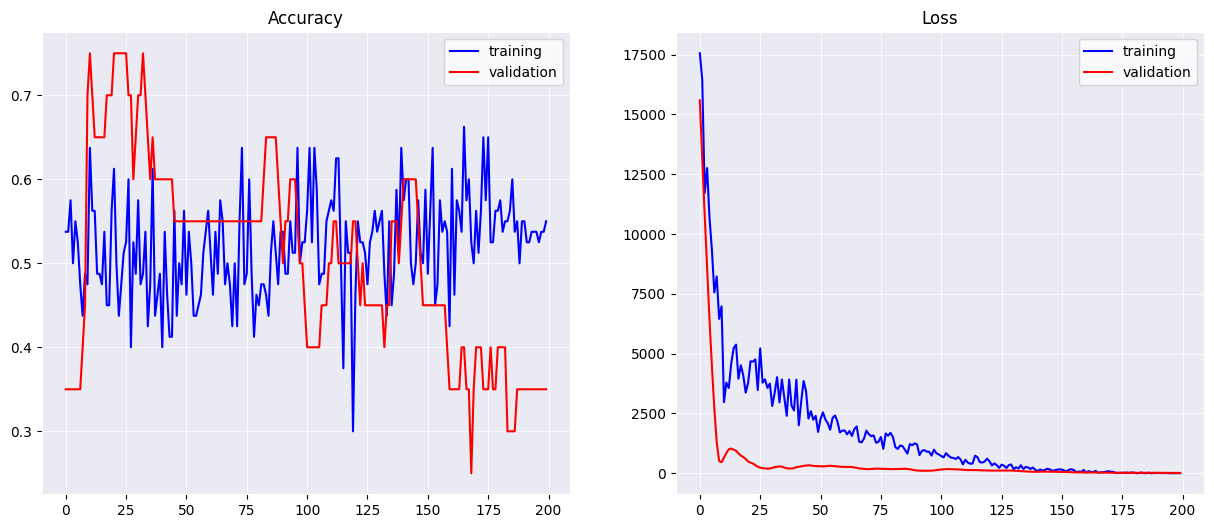

In [202]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=False)
ax[0].plot(epochs, acc,
          color='b',
          label='training')
ax[0].plot(epochs, val_acc,
          color='r',
          label='validation')
ax[0].set_title('Accuracy')
ax[0].grid(which='both', alpha=0.8, c='white')
ax[0].set_facecolor('#eaeaf2')
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['right'].set_color('white')
ax[0].spines['left'].set_color('white')
ax[0].legend()
ax[1].plot(epochs, loss,
          color='b',
          label='training')
ax[1].plot(epochs, val_loss,
          color='r',
          label='validation')
ax[1].set_title('Loss')
ax[1].grid(which='both', alpha=0.8, c='white')
ax[1].set_facecolor('#eaeaf2')
ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('white')
ax[1].spines['right'].set_color('white')
ax[1].spines['left'].set_color('white')
ax[1].legend()

plt.show()

In [ ]:
model.predict() # predict win or lose based on new match info